In [1]:
import sys
import os

# Add the project root to the Python path
package_root = os.path.abspath(os.path.join(os.getcwd(), "../"))
print(f"Adding package root to sys.path: {package_root}")
if package_root not in sys.path:
	sys.path.append(package_root)


notebook_dir = os.getcwd()
print(f"Current notebook directory: {notebook_dir}")
# change to the directory to the root of the project
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
print(f"Project root: {project_root}")
os.chdir(project_root)

from dotenv import load_dotenv
load_dotenv()

Adding package root to sys.path: /home/mafzaal/source/lets-talk/py-src
Current notebook directory: /home/mafzaal/source/lets-talk/py-src/notebooks
Project root: /home/mafzaal/source/lets-talk


True

In [ ]:
#os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [3]:
print(os.environ["LANGCHAIN_TRACING_V2"])

true


In [2]:
from langchain_core.messages import HumanMessage
import importlib

In [3]:
import nest_asyncio
nest_asyncio.apply()

In [6]:
import lets_talk.chains as chains
import lets_talk.prompts as prompts

In [7]:
from lets_talk.config import Configuration

congiruation = Configuration()

print(Configuration.react_agent_prompt)

You are a helpful AI assistant. Your task is to use the provided tools to answer the user's question.
System time: {system_time}



In [ ]:
import datetime
from langchain.prompts import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
    MessagesPlaceholder,
)
prompt =  ChatPromptTemplate.from_messages( [SystemMessagePromptTemplate.from_template(prompts.REACT_AGENT_PROMPT),MessagesPlaceholder(variable_name="history"), HumanMessagePromptTemplate.from_template("{input}")])

time = datetime.datetime.now(tz=datetime.timezone.utc).isoformat()

a = prompt.invoke({"system_time": time,"history": ["A","B"], "input": "hello"})
print(a)

# from lets_talk.config import LLM_MODEL
# from langchain.chat_models import init_chat_model
# b = (prompt |  init_chat_model(LLM_MODEL)).invoke({"system_time": time,"history": [], "input": "What is current time in CST?"})
# print(b)


In [ ]:
# hot reload the module

importlib.reload(chains)
importlib.reload(prompts)


In [4]:
#display marked down
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#printmd(r.content)

In [6]:
import lets_talk.agent as agent


Some weights of BertModel were not initialized from the model checkpoint at mafzaal/thedataguy_arctic_ft and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loaded vector store from ./db/vector_store_tdg_1


In [7]:
importlib.reload(agent)


<module 'lets_talk.agent' from '/home/mafzaal/source/lets-talk/py-src/lets_talk/agent.py'>

In [8]:

uncompiled_graph = agent.build_graph()
graph =  uncompiled_graph.compile()

#show the graph

#print(graph.get_graph().draw_ascii())

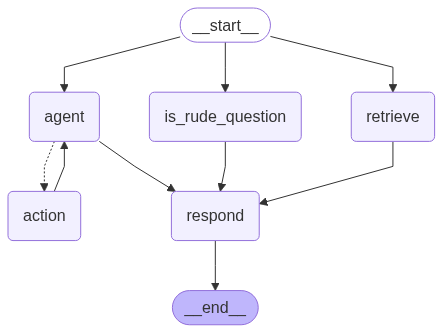

In [9]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
from langchain_core.runnables import RunnableConfig
config = RunnableConfig(
        configurable={"user_id": "abc", }
    )

In [ ]:

# from lets_talk.config import Configuration
# config = Configuration()
# a= await agent.check_question_tone({"question": "Give me latest?"},config=config)

# print(a)


a = await graph.ainvoke({"question": "Go to hell?"},config=config)
print(a)

{'messages': [AIMessage(content="It seems like you might be feeling frustrated or upset. I'm here to help if you want to talk about what's on your mind or if there's something specific you need assistance with.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 223, 'total_tokens': 259, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_92e0377081', 'id': 'chatcmpl-BaE5YuODz20B7p2tLb24YOBK85SW3', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9d1837cb-4f46-4816-9ad5-01d0419666a9-0', usage_metadata={'input_tokens': 223, 'output_tokens': 36, 'total_tokens': 259, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), AIMe

In [55]:
a["messages"]

[AIMessage(content="It seems like you might be feeling frustrated or upset. I'm here to help if you want to talk about what's on your mind or if there's something specific you need assistance with.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 223, 'total_tokens': 259, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_92e0377081', 'id': 'chatcmpl-BaE5YuODz20B7p2tLb24YOBK85SW3', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9d1837cb-4f46-4816-9ad5-01d0419666a9-0', usage_metadata={'input_tokens': 223, 'output_tokens': 36, 'total_tokens': 259, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 AIMessage(conten

In [56]:
printmd(a["messages"][-1].content)

I understand that you might be feeling really frustrated right now, and that’s completely okay. We all have our moments! 🌈 If there's something specific on your mind, I'm here to listen and help in any way I can. Let's find a brighter way forward together! 🌟

In [52]:
a["is_rude"]

True

In [57]:
b = await graph.ainvoke({"question": "What is current time in CDT?"},config=config)
print(b)

{'messages': [AIMessage(content='Central Daylight Time (CDT) is UTC-5. Given that the current UTC time is 04:18:44 on May 23, 2025, the current time in CDT would be:\n\n04:18:44 - 5 hours = 23:18:44 on May 22, 2025.\n\nSo, the current time in CDT is 11:18 PM on May 22, 2025.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 226, 'total_tokens': 317, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'id': 'chatcmpl-BaE9khPNaU1GMXbmefFVZGeSpTrPx', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4fbdd0a4-1857-4c1b-a5ff-909c9074ab2a-0', usage_metadata={'input_tokens': 226, 'output_tokens': 91, 'total_tokens': 317, 'input_token_details': {'audio': 0, 'cache_read':

In [40]:
b["messages"][-1].content

"I don't know. However, you can easily find the current time in Central Daylight Time (CDT) by checking a reliable world clock or using a time zone converter online. If you have any questions related to data science, AI, or topics covered in TheDataGuy's blog, feel free to ask!"

In [21]:
b["messages"]

[HumanMessage(content='What is current time in CDT?', additional_kwargs={}, response_metadata={}, id='f6bcd8a9-b9c5-4e1b-9d31-f6fcbcbf9065'),
 AIMessage(content="I don't know. However, I can help you with topics related to data science, AI evaluation, RAG systems, and more. If you have any questions in those areas, feel free to ask!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 569, 'total_tokens': 611, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'id': 'chatcmpl-BaDMYtunbqHEgcfbXqK0J9h2IVR3h', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--735395ba-8c8c-48c2-9b40-fe2ee2d02c5c-0', usage_metadata={'input_tokens': 569, 'output_tokens': 42, 'total_toke

In [30]:
b["documents"]

[Document(metadata={'source': 'data/metric-driven-development/index.md', 'url': 'https://thedataguy.pro/blog/metric-driven-development/', 'post_slug': 'metric-driven-development', 'post_title': 'Metric-Driven Development: Make Smarter Decisions, Faster', 'cover_image': 'https://thedataguy.pro/blog/images/metric-driven-development.png', 'date': '2025-05-05T00:00:00-06:00', 'categories': ['Development', 'Productivity', 'AI', 'Management'], 'description': "Your Team's Secret Weapon for Cutting Through Noise and Driving Real Progress. Learn how to use clear metrics to eliminate guesswork and make faster, smarter progress in your projects.", 'reading_time': '9', 'published': True, 'content_length': 12450, '_id': '429b48d153cb42bf99655df76ed04115', '_collection_name': 'thedataguy_documents'}, page_content="Reward functions embody the core MDD idea: set a clear, measurable goal, and let it guide actions towards success.\n\n## Metric-Driven Development Across Industries: Real-World Examples\n\

In [ ]:
from lets_talk.utils import format_docs_v2

docs = b.get("documents", [])
if docs:
    formatted_docs = format_docs_v2(docs)
    print(formatted_docs)

**source:** data/metric-driven-development/index.md
**url:** https://thedataguy.pro/blog/metric-driven-development/
**post_slug:** metric-driven-development
**post_title:** Metric-Driven Development: Make Smarter Decisions, Faster
**cover_image:** https://thedataguy.pro/blog/images/metric-driven-development.png
**date:** 2025-05-05T00:00:00-06:00
**categories:** ['Development', 'Productivity', 'AI', 'Management']
**description:** Your Team's Secret Weapon for Cutting Through Noise and Driving Real Progress. Learn how to use clear metrics to eliminate guesswork and make faster, smarter progress in your projects.
**reading_time:** 9
**published:** True
**content_length:** 12450
**_id:** 429b48d153cb42bf99655df76ed04115
**_collection_name:** thedataguy_documents

**content:** Reward functions embody the core MDD idea: set a clear, measurable goal, and let it guide actions towards success.

## Metric-Driven Development Across Industries: Real-World Examples

MDD isn't just for software. He

In [58]:
d = await graph.ainvoke({"question": "What is data value chain?"},config=config)

In [46]:
printmd(d["messages"][-1].content)

The data value chain is a conceptual framework that outlines the various stages through which data passes, from its initial collection to its ultimate use in decision-making and value creation. It emphasizes the importance of managing data effectively at each stage to maximize its value for an organization. Here’s a breakdown of the key components of the data value chain:

1. **Data Collection**: This is the first step where data is gathered from various sources, such as sensors, transactions, social media, and more. The quality and relevance of the data collected are crucial for the subsequent stages.

2. **Data Storage**: Once collected, data needs to be stored in a way that ensures it is secure, accessible, and organized. This can involve databases, data lakes, or cloud storage solutions.

3. **Data Processing**: In this stage, raw data is cleaned, transformed, and organized to make it suitable for analysis. This may involve data normalization, aggregation, and enrichment.

4. **Data Analysis**: This is where insights are derived from the processed data using statistical methods, machine learning, or other analytical techniques. The goal is to identify patterns, trends, and correlations that can inform decision-making.

5. **Data Visualization**: Presenting data in a visual format (like charts, graphs, and dashboards) helps stakeholders understand the insights derived from the analysis more easily.

6. **Data Interpretation**: This involves contextualizing the insights gained from data analysis to make informed decisions. It requires domain knowledge and an understanding of the business context.

7. **Data Utilization**: Finally, the insights are used to drive actions, strategies, and decisions within the organization. This could involve optimizing operations, enhancing customer experiences, or developing new products.

8. **Feedback Loop**: The outcomes of decisions made using data should be monitored and evaluated, creating a feedback loop that informs future data collection and analysis efforts.

Understanding the data value chain is essential for organizations looking to leverage data as a strategic asset. It highlights the need for a comprehensive data strategy that encompasses governance, quality control, and analytics to ensure that data can deliver maximum value.

For more insights on data strategy and its importance, you can check out the blog post [Data is King: Why Your Data Strategy IS Your Business Strategy](https://thedataguy.pro/blog/data-is-king/).

In [ ]:
from langchain_core.messages import HumanMessage

In [59]:
async for chunk,_ in graph.astream({"question": "Give me latest blog posts"}, stream_mode="messages", config=config):
    print(chunk.content,end="")
    #print("\n")

#response

NOI currently don't have direct access to browse the internet or retrieve the latest blog posts. However, you can check the latest posts on TheDataGuy's blog by visiting their website directly. If you have any specific topics in mind or need information on a particular subject, feel free to ask!

In [60]:
async for chunk,metadata in graph.astream({"question": "What is data value chain?"}, stream_mode="messages"):
    if (
            chunk.content
            and not isinstance(chunk, HumanMessage)
            and metadata["langgraph_node"] == "respond"
        ):
        print(chunk.content,end="")
    #print("\n")

In [ ]:

uncompiled_graph = agent.build_graph()
graph =  uncompiled_graph.compile()
response = await graph.ainvoke({"question": "Greet the user and provide latest blog posts"},config=config)

In [ ]:
from lets_talk.utils import get_message_text
printmd(get_message_text(response["messages"][-1]))

In [ ]:
response =  await graph.ainvoke({"question": "Who are you?"},config=config)
printmd(response["messages"][-1].content)

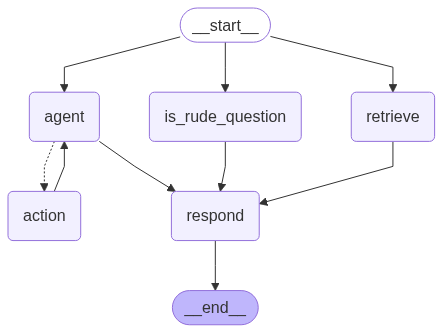

In [10]:
importlib.reload(agent)

uncompiled_graph = agent.build_graph()
graph =  uncompiled_graph.compile()
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [50]:
response =  await graph.ainvoke({"question": "Who are you?"},config=config)
printmd(response["messages"][-1].content)

I am TheDataGuy Chat, a specialized assistant designed to help you with topics related to data science, AI evaluation, RAG systems, research agents, and metric-driven development, based on the insights from Muhammad Afzaal's blog at [thedataguy.pro](https://thedataguy.pro). If you have questions or need assistance in these areas, feel free to ask!

In [ ]:
#os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [51]:
# Update the config dictionary to include recursion_limit
config_with_recursion = {**config, "recursion_limit": 10}

query = "I'm Isa and my email is isa@thedataguy.pro, send a message to thedataguy that I like your blog."

response = await graph.ainvoke({"question": query,"messages":[HumanMessage(content=query)]}, config=config_with_recursion)
printmd(response["messages"][-1].content)

Your message has been successfully sent to TheDataGuy. You will receive a response at your email, isa@thedataguy.pro, soon.

In [33]:
response

{'messages': [AIMessage(content='How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 215, 'total_tokens': 223, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'id': 'chatcmpl-BaRmRQ8GYGjhxFI3JolyfV08j5pox', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3c19802c-a49b-405f-8346-da1ad6f18750-0', usage_metadata={'input_tokens': 215, 'output_tokens': 8, 'total_tokens': 223, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})],
 'question': "I'm Isa and my email is isa@thedataguy.pro, send a message to thedataguy that I like your blog.",
 'is_rude': False,
 'documents': [Document(

In [41]:
response = await graph.ainvoke({"question": "What is current time in CDT?"},config=config)

printmd(response["messages"][-1].content)


The current time in Central Daylight Time (CDT) is 5:57 PM on May 23, 2025.

In [48]:
response

{'messages': [AIMessage(content='Central Daylight Time (CDT) is UTC-5. Given that the current UTC time is 22:57 on May 23, 2025, the current time in CDT would be:\n\n22:57 UTC - 5 hours = 17:57 (or 5:57 PM) on May 23, 2025.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 226, 'total_tokens': 298, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BaVcYNvgjTKPmfPSpXLpDHdaL0YzJ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c27b6721-71b3-4fa2-ae4d-a8f9844a47be-0', usage_metadata={'input_tokens': 226, 'output_tokens': 72, 'total_tokens': 298, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning

In [ ]:
response = await graph.ainvoke({"question": "What is current time in CDT?"},config=config)

In [13]:
async for chunk,_ in graph.astream({"question": "Give me latest blog posts","messages":[HumanMessage(content="Give me latest blog posts")]}, stream_mode="messages", config=config):
    print(chunk.content,end="")

NOFound 5 recent blog posts from TheDataGuy:

📝 Build 🏗️ Ship 🚢 Share 🚀 Is the Way
📅 Published: 2025-05-20T06:00:00.000Z
⏱️ Reading time: 5 minutes
🏷️ Categories: AI, Personal Journey, Mindset
📌 URL: https://thedataguy.pro/blog/2025/05/build-ship-share/
📋 Description: How the 'Build, Ship, Share' mindset—championed by the AI Makerspace Bootcamp—reignited my passion for technology, learning, and community.

📝 Evaluating Advanced RAG Retrievers: A Practical Comparison
📅 Published: 2025-05-18T06:00:00.000Z
⏱️ Reading time: 7 minutes
🏷️ Categories: AI, RAG, Evaluation, LangChain, Ragas
📌 URL: https://thedataguy.pro/blog/2025/05/evaluating-advanced-rag-retrievers/
📋 Description: A hands-on, metric-driven comparison of advanced retrieval strategies for RAG systems using LangChain and Ragas. See which retriever wins on accuracy, speed, and cost.

📝 Building Your AI Data Moat: Competitive Advantage Through Proprietary Data
📅 Published: 2025-05-16T06:00:00.000Z
⏱️ Reading time: 8 minutes
🏷️ Cat